<a href="https://colab.research.google.com/github/BhumiChaudhary04/Burnt-Calories-prediction-System/blob/main/burnt_calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#from sklearn.ensemble import RandomForestRegressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Loading the dataset calories.csv

In [2]:
# Loading the dataset from calories.csv file to Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [3]:
# First 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Loading the dataset exercise.csv

In [4]:
# Loading the dataset from exercise.csv file to Pandas DataFrame
exercise_data = pd.read_csv('exercise.csv')

In [5]:
# First 5 rows of the dataframe
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining two datasets 

In [6]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

Data Preprocessing

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
# number of rows and columns of dataset
calories_data.shape

(15000, 9)

In [9]:
# information about the dataset
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Checking and Removing missing values

In [10]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [11]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [12]:
sns.set()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


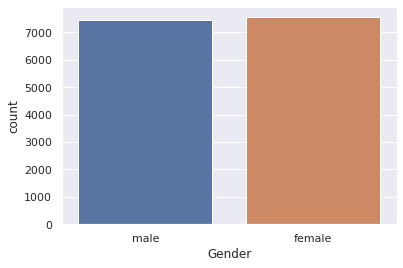

In [13]:
# plotting the "gender" column in count plot
sns.countplot(calories_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


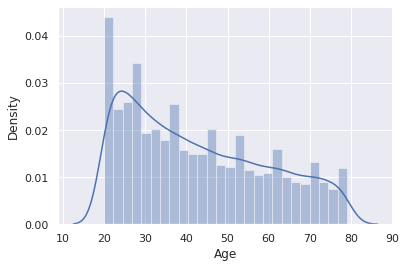

In [14]:
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


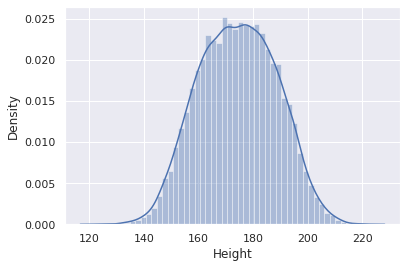

In [15]:
sns.distplot(calories_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


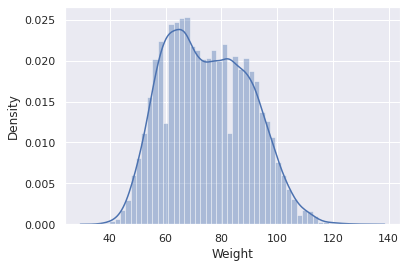

In [16]:
sns.distplot(calories_data['Weight'])

Finding the Correlation 

In [17]:
correlation = calories_data.corr()

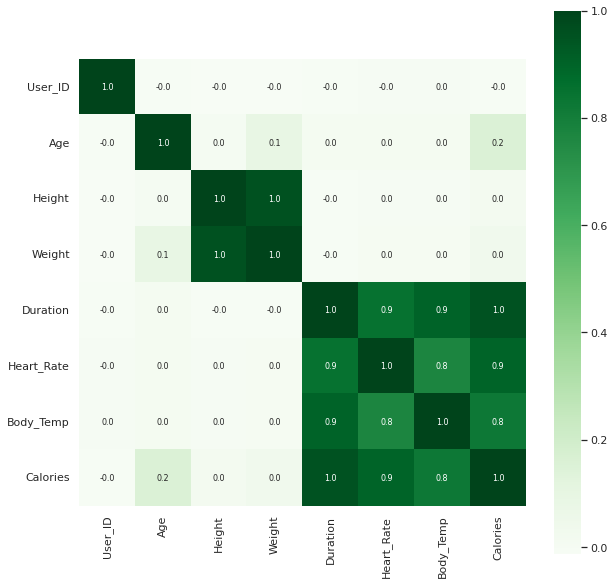

In [18]:
# heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')


Converting the text data to numerical data



In [19]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [20]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Dividing dataset into independent features and dependent target class

In [21]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [22]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [23]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#sc=StandardScaler()
#X=sc.fit_transform(X)

Splitting the dataset into Training dataset and Test dataset

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Loading the XGBoost Regressor model

In [26]:
model = XGBRegressor()

In [ ]:
# model= GradientBoostingRegressor()

In [ ]:
# model = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
#X_test=X_test[X_train.columns]

Training the model with training dataset

In [27]:
model.fit(X_train, Y_train)

[10:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Prediction on test dataset

In [28]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


Calculating Mean Absolute Error 

In [31]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  2.7159012502233186


In [30]:
# X_test=X_test[X_train.columns]

Prediction by the model

In [33]:
a = int(input("Gender 0 for male and 1 for female : "))
b = int(input("Age : "))
c = float(input("Height : "))
d = float(input("Weight : "))
e = float(input("Duration of Exercise : "))
f = float(input("Heart Rate after Exercise : "))
g = float(input("Body Temperature after Exercise : "))

input_data = (a,b,c,d,e,f,g)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

input_data_reshaped=pd.DataFrame(input_data_reshaped)
print(input_data_reshaped)

input_data_reshaped.columns=['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp']

print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The no. of Burnt Calories during exercise is :  ', prediction[0])

Gender 0 for male and 1 for female : 0
Age : 68
Height : 190
Weight : 94
Duration of Exercise : 29
Heart Rate after Exercise : 105
Body Temperature after Exercise : 40
[[  0.  68. 190.  94.  29. 105.  40.]]
     0     1      2     3     4      5     6
0  0.0  68.0  190.0  94.0  29.0  105.0  40.0
   Gender   Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0     0.0  68.0   190.0    94.0      29.0       105.0       40.0
[230.33057]
The no. of Burnt Calories during exercise is :   230.33057
